# from the course : Udemy - Learning Python for Data Analysis and Visualization (2015)
#### this doc. contains these materials :
#### V13 Series , V14 DataFrames ,V15 index objects ,V16 Reindex,
#### V17 Drop entry , V18 Selecting entries , V19 Data alignment,
####  V20 Rank and sort , V21 Summary statistics ,V22 Missing data

## V13 Series


In [58]:
import numpy as np
import pandas as pd
from pandas import Series,DataFrame 

In [8]:
obj=Series([3,6,9,12])
obj

0     3
1     6
2     9
3    12
dtype: int64

In [9]:
obj.values

array([ 3,  6,  9, 12])

In [10]:
obj.index

RangeIndex(start=0, stop=4, step=1)

In [11]:
ww2_cas=Series([87000000,4300000,3000000,2100000,400000],index=['USSR', 'Germany','China','Japan','USA'])

In [12]:
ww2_cas


USSR       87000000
Germany     4300000
China       3000000
Japan       2100000
USA          400000
dtype: int64

In [13]:
ww2_cas['USA']

400000

In [16]:
# check which countries had casualties greater than 4   mil.
ww2_cas[ww2_cas >4000000]

USSR       87000000
Germany     4300000
dtype: int64

it works like np.where(arr<0,0,arr)

In [17]:
 'USSR' in ww2_cas

True

#### convert series into dictionary 

In [19]:
ww2_dict=ww2_cas.to_dict()
ww2_dict

{'USSR': 87000000,
 'Germany': 4300000,
 'China': 3000000,
 'Japan': 2100000,
 'USA': 400000}

In [20]:
ww2_series= Series(ww2_dict)
ww2_series

USSR       87000000
Germany     4300000
China       3000000
Japan       2100000
USA          400000
dtype: int64

In [26]:
countries = ['China','Germany','Japan','USA','USSR','Argentina']

In [27]:
obj2= Series(ww2_dict,index=countries)
obj2

China         3000000.0
Germany       4300000.0
Japan         2100000.0
USA            400000.0
USSR         87000000.0
Argentina           NaN
dtype: float64

In [28]:
pd.isnull(obj2)

China        False
Germany      False
Japan        False
USA          False
USSR         False
Argentina     True
dtype: bool

In [30]:
pd.notnull(obj2)

China         True
Germany       True
Japan         True
USA           True
USSR          True
Argentina    False
dtype: bool

In [31]:
ww2_series

USSR       87000000
Germany     4300000
China       3000000
Japan       2100000
USA          400000
dtype: int64

In [33]:
obj2

China         3000000.0
Germany       4300000.0
Japan         2100000.0
USA            400000.0
USSR         87000000.0
Argentina           NaN
dtype: float64

In [34]:
ww2_series + obj2

Argentina            NaN
China          6000000.0
Germany        8600000.0
Japan          4200000.0
USA             800000.0
USSR         174000000.0
dtype: float64

In [36]:
obj2.name='World War 2 Casualties '
obj2

China         3000000.0
Germany       4300000.0
Japan         2100000.0
USA            400000.0
USSR         87000000.0
Argentina           NaN
Name: World War 2 Casualties , dtype: float64

In [37]:
obj2.index.name='Countries'

In [38]:
obj2 


Countries
China         3000000.0
Germany       4300000.0
Japan         2100000.0
USA            400000.0
USSR         87000000.0
Argentina           NaN
Name: World War 2 Casualties , dtype: float64

# V14 DataFrames

In [39]:
from pandas import DataFrame 

In [40]:
import webbrowser 
website='http://en.wikipedia.org/wiki/NFL_win-loss_records'
webbrowser.open(website)

True

In [41]:
nfl_frame=pd.read_clipboard()


/Users/ramin-ka/anaconda3/lib/python3.6/site-packages/pandas/io/clipboards.py:63: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_table(StringIO(text), sep=sep, **kwargs)


In [42]:
nfl_frame

,Rank,Team,Won,Lost,Tied,Pct.,First NFL Season,Total Games,Division
0,1,Dallas Cowboys,502,374,6,0.573,1960,882,NFC East
1,2,Green Bay Packers,737,562,37,0.565,1921,"1,336",NFC North
2,3,Chicago Bears,749,579,42,0.562,1920,"1,370",NFC North
3,4,Miami Dolphins,445,351,4,0.559,1966,800,AFC East
4,5,New England Patriots[b],489,386,9,0.558,1960,884,AFC East


In [43]:
nfl_frame.columns

Index(['Rank', 'Team', 'Won', 'Lost', 'Tied', 'Pct.', 'First NFL Season',
       'Total Games', 'Division'],
      dtype='object')

In [44]:
nfl_frame.Rank

0    1
1    2
2    3
3    4
4    5
Name: Rank, dtype: int64

In [45]:
nfl_frame['First NFL Season']

0    1960
1    1921
2    1920
3    1966
4    1960
Name: First NFL Season, dtype: int64

In [46]:
DataFrame(nfl_frame,columns=['Team','First NFL Season','Total Games'])

,Team,First NFL Season,Total Games
0,Dallas Cowboys,1960,882
1,Green Bay Packers,1921,"1,336"
2,Chicago Bears,1920,"1,370"
3,Miami Dolphins,1966,800
4,New England Patriots[b],1960,884


In [47]:
DataFrame(nfl_frame,columns=['Team','First NFL Season','Total Games','Statium'])

,Team,First NFL Season,Total Games,Statium
0,Dallas Cowboys,1960,882,NaN
1,Green Bay Packers,1921,"1,336",NaN
2,Chicago Bears,1920,"1,370",NaN
3,Miami Dolphins,1966,800,NaN
4,New England Patriots[b],1960,884,NaN


In [48]:
nfl_frame

,Rank,Team,Won,Lost,Tied,Pct.,First NFL Season,Total Games,Division
0,1,Dallas Cowboys,502,374,6,0.573,1960,882,NFC East
1,2,Green Bay Packers,737,562,37,0.565,1921,"1,336",NFC North
2,3,Chicago Bears,749,579,42,0.562,1920,"1,370",NFC North
3,4,Miami Dolphins,445,351,4,0.559,1966,800,AFC East
4,5,New England Patriots[b],489,386,9,0.558,1960,884,AFC East


In [52]:
nfl_frame.head(3)

,Rank,Team,Won,Lost,Tied,Pct.,First NFL Season,Total Games,Division
0,1,Dallas Cowboys,502,374,6,0.573,1960,882,NFC East
1,2,Green Bay Packers,737,562,37,0.565,1921,"1,336",NFC North
2,3,Chicago Bears,749,579,42,0.562,1920,"1,370",NFC North


In [53]:
nfl_frame.tail(3)

,Rank,Team,Won,Lost,Tied,Pct.,First NFL Season,Total Games,Division
2,3,Chicago Bears,749,579,42,0.562,1920,"1,370",NFC North
3,4,Miami Dolphins,445,351,4,0.559,1966,800,AFC East
4,5,New England Patriots[b],489,386,9,0.558,1960,884,AFC East


In [55]:
# ix ---- index
nfl_frame.ix[3]

/Users/ramin-ka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  


Rank                             4
Team                Miami Dolphins
Won                            445
Lost                           351
Tied                             4
Pct.                         0.559
First NFL Season              1966
Total Games                    800
Division                  AFC East
Name: 3, dtype: object

In [56]:
nfl_frame['Stadium']="Levi's Stadium"

In [57]:
nfl_frame

,Rank,Team,Won,Lost,Tied,Pct.,First NFL Season,Total Games,Division,Stadium
0,1,Dallas Cowboys,502,374,6,0.573,1960,882,NFC East,Levi's Stadium
1,2,Green Bay Packers,737,562,37,0.565,1921,"1,336",NFC North,Levi's Stadium
2,3,Chicago Bears,749,579,42,0.562,1920,"1,370",NFC North,Levi's Stadium
3,4,Miami Dolphins,445,351,4,0.559,1966,800,AFC East,Levi's Stadium
4,5,New England Patriots[b],489,386,9,0.558,1960,884,AFC East,Levi's Stadium


In [62]:
nfl_frame['Stadium']=np.arange(5)
nfl_frame

,Rank,Team,Won,Lost,Tied,Pct.,First NFL Season,Total Games,Division,Stadium
0,1,Dallas Cowboys,502,374,6,0.573,1960,882,NFC East,0
1,2,Green Bay Packers,737,562,37,0.565,1921,"1,336",NFC North,1
2,3,Chicago Bears,749,579,42,0.562,1920,"1,370",NFC North,2
3,4,Miami Dolphins,445,351,4,0.559,1966,800,AFC East,3
4,5,New England Patriots[b],489,386,9,0.558,1960,884,AFC East,4


In [66]:
stadiums=Series(["Levi's stadium",'AT&T Stadium'],index=[4,0])

In [67]:
stadiums

4    Levi's stadium
0      AT&T Stadium
dtype: object

In [68]:
nfl_frame['Stadium']=stadiums
nfl_frame

,Rank,Team,Won,Lost,Tied,Pct.,First NFL Season,Total Games,Division,Stadium
0,1,Dallas Cowboys,502,374,6,0.573,1960,882,NFC East,AT&T Stadium
1,2,Green Bay Packers,737,562,37,0.565,1921,"1,336",NFC North,NaN
2,3,Chicago Bears,749,579,42,0.562,1920,"1,370",NFC North,NaN
3,4,Miami Dolphins,445,351,4,0.559,1966,800,AFC East,NaN
4,5,New England Patriots[b],489,386,9,0.558,1960,884,AFC East,Levi's stadium


In [69]:
del nfl_frame['Stadium']

In [70]:
nfl_frame

,Rank,Team,Won,Lost,Tied,Pct.,First NFL Season,Total Games,Division
0,1,Dallas Cowboys,502,374,6,0.573,1960,882,NFC East
1,2,Green Bay Packers,737,562,37,0.565,1921,"1,336",NFC North
2,3,Chicago Bears,749,579,42,0.562,1920,"1,370",NFC North
3,4,Miami Dolphins,445,351,4,0.559,1966,800,AFC East
4,5,New England Patriots[b],489,386,9,0.558,1960,884,AFC East


In [71]:
data={"City":['SF','LA','NYC'],"Population":[837000,3880000,8400000]}

In [73]:
city_frame=DataFrame(data)

In [74]:
city_frame

,City,Population
0,SF,837000
1,LA,3880000
2,NYC,8400000


In [75]:
  #For full list of ways to create DataFrames from various sources go to teh documentation for pandas:
website = 'http://pandas.pydata.org/pandas-docs/dev/generated/pandas.DataFrame.html'
webbrowser.open(website)

True

## V15 index objects 

In [3]:
my_ser = Series([1,2,3,4],index=['A','B','C','D'])
my_ser

A    1
B    2
C    3
D    4
dtype: int64

In [5]:
my_index=my_ser.ix['A']
my_index

/Users/ramin-ka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


1

In [6]:
my_index=my_ser.index
my_index

Index(['A', 'B', 'C', 'D'], dtype='object')

In [7]:
my_index[2]

'C'

In [8]:
my_index[2:]

Index(['C', 'D'], dtype='object')

In [9]:
my_index[0]

'A'

In [12]:
my_index[0]='Z'


TypeError: Index does not support mutable operations

##### indexes are imutable and we cann't change them like this and we should define new set of indexes 

## V16 Reindex

In [13]:
from  numpy.random import randn

In [14]:
ser1=Series([1,2,3,4],index=['A','B','C','D'])

In [15]:
ser1

A    1
B    2
C    3
D    4
dtype: int64

In [23]:
ser2=ser1.reindex(['A','B','C','D','E','F'])
ser2


A    1.0
B    2.0
C    3.0
D    4.0
E    NaN
F    NaN
dtype: float64

In [25]:
ser2.reindex(['A','B','C','D','E','F','G'],fill_value=0)


A    1.0
B    2.0
C    3.0
D    4.0
E    NaN
F    NaN
G    0.0
dtype: float64

In [26]:
ser2

A    1.0
B    2.0
C    3.0
D    4.0
E    NaN
F    NaN
dtype: float64

In [27]:
ser3=Series(['USA','Mexico','Canada'],index=[0,5,10])
ser3

0        USA
5     Mexico
10    Canada
dtype: object

In [28]:
ranger=range(15)
ranger

range(0, 15)

In [31]:
ser3.reindex(ranger,method='ffill')



0        USA
1        USA
2        USA
3        USA
4        USA
5     Mexico
6     Mexico
7     Mexico
8     Mexico
9     Mexico
10    Canada
11    Canada
12    Canada
13    Canada
14    Canada
dtype: object

method : {None, ‘backfill’/’bfill’, ‘pad’/’ffill’, ‘nearest’}, optional

method to use for filling holes in reindexed DataFrame. Please note: this is only applicable to DataFrames/Series with a monotonically increasing/decreasing index.

default: don’t fill gaps
pad / ffill: propagate last valid observation forward to next valid
backfill / bfill: use next valid observation to fill gap
nearest: use nearest valid observations to fill gap

In [34]:
dframe=DataFrame(randn(25).reshape((5,5)),index=['A','B','D','E','F'],columns=['col1','col2','col3','col4','col5']  )
dframe


,col1,col2,col3,col4,col5
A,-1.357411,0.561818,0.406978,-1.517501,-1.369685
B,-0.576326,-1.500757,0.845315,0.941240,-0.486791
D,1.722268,-0.437414,-0.758487,-0.160427,-0.470983
E,-1.413063,-1.301799,0.133808,-0.355449,1.197353
F,0.549294,-0.328489,0.690128,-0.592462,2.484725


In [38]:
dframe2=dframe.reindex(["A",'B','C','D','E','F'])
dframe2

,col1,col2,col3,col4,col5
A,-1.357411,0.561818,0.406978,-1.517501,-1.369685
B,-0.576326,-1.500757,0.845315,0.941240,-0.486791
C,NaN,NaN,NaN,NaN,NaN
D,1.722268,-0.437414,-0.758487,-0.160427,-0.470983
E,-1.413063,-1.301799,0.133808,-0.355449,1.197353
F,0.549294,-0.328489,0.690128,-0.592462,2.484725


In [39]:
new_columns=['col1','col2','col3','col4','col5','col6']

In [40]:
dframe2.reindex(columns=new_columns)


,col1,col2,col3,col4,col5,col6
A,-1.357411,0.561818,0.406978,-1.517501,-1.369685,NaN
B,-0.576326,-1.500757,0.845315,0.941240,-0.486791,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN
D,1.722268,-0.437414,-0.758487,-0.160427,-0.470983,NaN
E,-1.413063,-1.301799,0.133808,-0.355449,1.197353,NaN
F,0.549294,-0.328489,0.690128,-0.592462,2.484725,NaN


In [45]:
dframe.reindex(['A','B','X','E','F'])

,col1,col2,col3,col4,col5
A,-1.357411,0.561818,0.406978,-1.517501,-1.369685
B,-0.576326,-1.500757,0.845315,0.941240,-0.486791
X,NaN,NaN,NaN,NaN,NaN
E,-1.413063,-1.301799,0.133808,-0.355449,1.197353
F,0.549294,-0.328489,0.690128,-0.592462,2.484725


In [46]:
dframe


,col1,col2,col3,col4,col5
A,-1.357411,0.561818,0.406978,-1.517501,-1.369685
B,-0.576326,-1.500757,0.845315,0.941240,-0.486791
D,1.722268,-0.437414,-0.758487,-0.160427,-0.470983
E,-1.413063,-1.301799,0.133808,-0.355449,1.197353
F,0.549294,-0.328489,0.690128,-0.592462,2.484725


In [44]:
dframe.reindex(index=['A','B','C','D','E','F'],new_columns)

SyntaxError: positional argument follows keyword argument (<ipython-input-44-69556b4cf498>, line 1)

we can't reindex both rows and columns concurently and for this porpose we should use ix method 

In [43]:
dframe.ix[['A','B','C','D','E','F'],new_columns]

/Users/ramin-ka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.
/Users/ramin-ka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  """Entry point for launching an IPython kernel.


,col1,col2,col3,col4,col5,col6
A,-1.357411,0.561818,0.406978,-1.517501,-1.369685,NaN
B,-0.576326,-1.500757,0.845315,0.941240,-0.486791,NaN
C,NaN,NaN,NaN,NaN,NaN,NaN
D,1.722268,-0.437414,-0.758487,-0.160427,-0.470983,NaN
E,-1.413063,-1.301799,0.133808,-0.355449,1.197353,NaN
F,0.549294,-0.328489,0.690128,-0.592462,2.484725,NaN


## V17 Drop entry

In [49]:
ser1=Series(np.arange(3),index=['a','b','c'])
ser1

a    0
b    1
c    2
dtype: int64

In [51]:
ser1.drop('b')

a    0
c    2
dtype: int64

In [53]:
dframe1=DataFrame(np.arange(9).reshape((3,3)),index=['SF','LA','NY'],columns=['pop','size','year'])
dframe1

,pop,size,year
SF,0,1,2
LA,3,4,5
NY,6,7,8


In [54]:
dframe1.drop('LA')

,pop,size,year
SF,0,1,2
NY,6,7,8


In [55]:
dframe1

,pop,size,year
SF,0,1,2
LA,3,4,5
NY,6,7,8


In [56]:
dframe2=dframe1.drop('LA')
dframe2

,pop,size,year
SF,0,1,2
NY,6,7,8


In [57]:
dframe1

,pop,size,year
SF,0,1,2
LA,3,4,5
NY,6,7,8


In [64]:
#since we are not droping a row we should declare witch axis we are
#going to drop and by default the axis value is 0 
# in fact the axis 1 means the columns part and the axis 0 means the rows part 
dframe1.drop('year',axis=1)

,pop,size
SF,0,1
LA,3,4
NY,6,7


## V18 Selecting entries

In [65]:
ser1=Series(np.arange(3),index=['A','B','C'])
ser1=2*ser1
ser1

A    0
B    2
C    4
dtype: int64

In [66]:
ser1['B']

2

In [67]:
ser1[1]



2

In [69]:
ser1[0:2]


A    0
B    2
dtype: int64

In [70]:
ser1[['A','B']]

A    0
B    2
dtype: int64

In [71]:
ser1[ser1>3]

C    4
dtype: int64

In [72]:
ser1[ser1>3]=10

In [74]:
ser1


A     0
B     2
C    10
dtype: int64

In [78]:
dframe=DataFrame(np.arange(25).reshape((5,5)),index=["NYC",'LA','SF','DC','CHi'],
                columns=['A','SF','C','D','E'])

In [79]:
dframe

,A,SF,C,D,E
NYC,0,1,2,3,4
LA,5,6,7,8,9
SF,10,11,12,13,14
DC,15,16,17,18,19
CHi,20,21,22,23,24


In [81]:
#?????????
dframe['SF']

NYC     1
LA      6
SF     11
DC     16
CHi    21
Name: SF, dtype: int64

In [95]:
#note that the index only represents the columns' index and we can not
# even declare the axis that we mean !!!!
 dframe['LA'] #didn't run for printing issues 

In [89]:
dframe[['E','D']]

,E,D
NYC,4,3
LA,9,8
SF,14,13
DC,19,18
CHi,24,23


In [96]:
dframe[dframe['C']>8]



,A,SF,C,D,E
SF,10,11,12,13,14
DC,15,16,17,18,19
CHi,20,21,22,23,24


In [98]:
dframe[dframe>10]

,A,SF,C,D,E
NYC,NaN,NaN,NaN,NaN,NaN
LA,NaN,NaN,NaN,NaN,NaN
SF,NaN,11.0,12.0,13.0,14.0
DC,15.0,16.0,17.0,18.0,19.0
CHi,20.0,21.0,22.0,23.0,24.0


In [99]:
dframe>10

,A,SF,C,D,E
NYC,False,False,False,False,False
LA,False,False,False,False,False
SF,False,True,True,True,True
DC,True,True,True,True,True
CHi,True,True,True,True,True


In [100]:
dframe.ix['LA']

/Users/ramin-ka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


A     5
SF    6
C     7
D     8
E     9
Name: LA, dtype: int64

In [103]:
dframe.ix['SF']

/Users/ramin-ka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


A     10
SF    11
C     12
D     13
E     14
Name: SF, dtype: int64

In [104]:
dframe.ix[1]

/Users/ramin-ka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


A     5
SF    6
C     7
D     8
E     9
Name: LA, dtype: int64

## V19 Data alignment

In [105]:
ser1=Series([0,1,2],index=['A','B','C'])

In [106]:
ser1

A    0
B    1
C    2
dtype: int64

In [108]:
ser2=Series([3,4,5,6],index=['A','B','C','D'])
ser2



A    3
B    4
C    5
D    6
dtype: int64

In [109]:
ser1+ser2

A    3.0
B    5.0
C    7.0
D    NaN
dtype: float64

In [114]:
dframe1=DataFrame(np.arange(4).reshape((2,2)),
                 columns=list('AB'),index=['NYC','LA'])
dframe1

,A,B
NYC,0,1
LA,2,3


In [115]:
dframe2=DataFrame(np.arange(9).reshape((3,3)),
                 columns=list('ADC'),index=['NYC','SF','LA'])
dframe2

,A,D,C
NYC,0,1,2
SF,3,4,5
LA,6,7,8


In [116]:
dframe1+dframe2



,A,B,C,D
LA,8.0,NaN,NaN,NaN
NYC,0.0,NaN,NaN,NaN
SF,NaN,NaN,NaN,NaN


In [118]:
dframe1.add(dframe2,fill_value=0)

#(SF,B) neither is  in dframe1 nor dframe2   

,A,B,C,D
LA,8.0,3.0,8.0,7.0
NYC,0.0,1.0,2.0,1.0
SF,3.0,NaN,5.0,4.0


In [119]:
ser3=dframe2.ix[0]

/Users/ramin-ka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


In [120]:
ser3




A    0
D    1
C    2
Name: NYC, dtype: int64

In [121]:
dframe2-ser3


,A,D,C
NYC,0,0,0
SF,3,3,3
LA,6,6,6


## V20 Rank and sort

In [123]:
ser1=Series(range(3),index=list('CBA'))
ser1

C    0
B    1
A    2
dtype: int64

In [126]:
ser1.sort_index()

A    2
B    1
C    0
dtype: int64

In [127]:
ser1.order()
#depricate

AttributeError: 'Series' object has no attribute 'order'

In [134]:
ser1.sort_values()

C    0
B    1
A    2
dtype: int64

In [135]:
ser2=Series(randn(10))
ser2


0    0.721167
1   -1.648981
2    0.411274
3    0.359771
4    0.237462
5   -1.973792
6   -0.992730
7    2.068553
8   -0.109943
9    0.389217
dtype: float64

In [137]:
ser2.sort_values()

5   -1.973792
1   -1.648981
6   -0.992730
8   -0.109943
4    0.237462
3    0.359771
9    0.389217
2    0.411274
0    0.721167
7    2.068553
dtype: float64

In [138]:
ser2.rank()



0     9.0
1     2.0
2     8.0
3     6.0
4     5.0
5     1.0
6     3.0
7    10.0
8     4.0
9     7.0
dtype: float64

In [139]:
ser3=Series(randn(10))
ser3

0   -0.331940
1   -0.683243
2    2.718127
3    2.383278
4   -0.172495
5    1.988925
6    0.048231
7   -1.055793
8   -1.214835
9   -0.450706
dtype: float64

In [146]:
ser3.rank()

0     5.0
1     3.0
2    10.0
3     9.0
4     6.0
5     8.0
6     7.0
7     2.0
8     1.0
9     4.0
dtype: float64

In [150]:
ser3.sort_values()
ser3.rank()


0     5.0
1     3.0
2    10.0
3     9.0
4     6.0
5     8.0
6     7.0
7     2.0
8     1.0
9     4.0
dtype: float64

## V21 Summary statistics

In [3]:
arr=np.array([[1,2,np.nan],[np.nan,3,4]])

In [4]:
dframe1=DataFrame(arr,index=list('AB'),columns=['One','Two','Three'])
dframe1

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,3.0,4.0


In [5]:
dframe1.sum()

One      1.0
Two      5.0
Three    4.0
dtype: float64

In [6]:
dframe1.sum(axis=1)

A    3.0
B    7.0
dtype: float64

In [8]:
dframe1.min()

One      1.0
Two      2.0
Three    4.0
dtype: float64

In [9]:
dframe1.max()

One      1.0
Two      3.0
Three    4.0
dtype: float64

In [11]:
dframe1.idxmin()

One      A
Two      A
Three    B
dtype: object

In [12]:
dframe1.idxmax()

One      A
Two      B
Three    B
dtype: object

In [13]:
dframe1.cumsum()

,One,Two,Three
A,1.0,2.0,NaN
B,NaN,5.0,4.0


In [14]:
dframe1.cumsum(axis=1)

,One,Two,Three
A,1.0,3.0,NaN
B,NaN,3.0,7.0


In [15]:
dframe1.describe()

,One,Two,Three
count,1.0,2.000000,1.0
mean,1.0,2.500000,4.0
std,NaN,0.707107,NaN
min,1.0,2.000000,4.0
25%,1.0,2.250000,4.0
50%,1.0,2.500000,4.0
75%,1.0,2.750000,4.0
max,1.0,3.000000,4.0


In [18]:
dframe1.describe(axis=1)
#so how are we supposed to describe in rows ?????

TypeError: describe() got an unexpected keyword argument 'axis'

In [21]:
from IPython.display import YouTubeVideo 

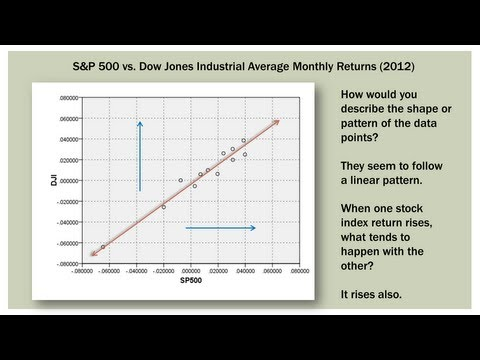

In [22]:
# For more information about Covariaance and Correlation
# Check out these great videos!
# Video credit: Brandon Foltz.

#CoVariance
YouTubeVideo('xGbpuFNR1ME')

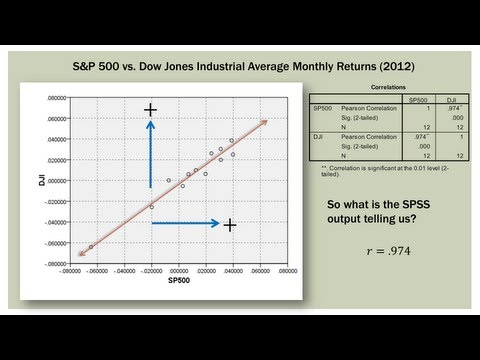

In [23]:
#Correlation
YouTubeVideo('4EXNedimDMs')

In [24]:
import pandas.io.data as pdweb 

ModuleNotFoundError: No module named 'pandas.io.data'

Hi, after calling your program via python markets.py, I found the following error:

ImportError: The pandas.io.data module is moved to a separate package (pandas-datareader). After installing the pandas-datareader package (https://github.com/pandas-dev/pandas-datareader), you can change the import from pandas.io import data, wb to from pandas_datareader import data, wb.

I think you should replace

import pandas.io.data
with

from pandas_datareader import data


In [31]:
from pandas_datareader import data

ImportError: cannot import name 'is_list_like'

Well, you just need 2 things First uninstall the lib -

pip uninstall pandas-datareader
And then need to install it using pip3 (Please notice it is pip3)

pip3 install pandas-datareader
And then use -

from pandas_datareader import data, wb
#..............

#................
data.DataReader()
 

In [13]:
from pandas_datareader import data ,wb
import datetime
#replace pdweb with data 

In [11]:
prices=data.get_data_yahoo(['CVX','XOM','BP'],
                           start=datetime.datetime(2010,1,1),
                          end=datetime.datetime(2013,1,1,))['Adj Close']
prices.head()

Symbols,BP,CVX,XOM
Date,,,
2009-12-31,37.717594,56.257736,52.406105
2010-01-04,38.485355,57.770306,53.143883
2010-01-05,38.758614,58.179535,53.351391
2010-01-06,38.960327,58.186836,53.812500
2010-01-07,38.947311,57.967628,53.643436


In [15]:
volume=data.get_data_yahoo(['CVX','XOM','BP'],
                           start=datetime.datetime(2010,1,1)
                          ,end=datetime.datetime(2013,1,1,))['Volume']
volume.head()

Symbols,BP,CVX,XOM
Date,,,
2009-12-31,1517600.0,4246600.0,18852300.0
2010-01-04,3956100.0,10173800.0,27809100.0
2010-01-05,4109600.0,10593700.0,30174700.0
2010-01-06,6227900.0,11014600.0,35044700.0
2010-01-07,4431300.0,9626900.0,27192100.0


In [21]:
#percentage in changes
rets=prices.pct_change()

In [51]:
#Correlation of the stocks 
corr=rets.corr

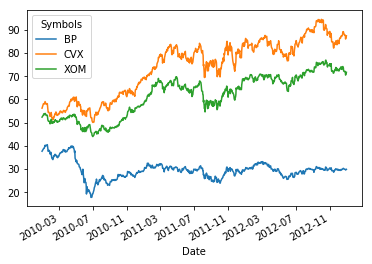

In [43]:
%matplotlib inline
prices.plot()

In [44]:
#ploting lib.
import seaborn as sns

In [45]:
import matplotlib.pyplot as plt

In [46]:
rets.head()

Symbols,BP,CVX,XOM
Date,,,
2009-12-31,NaN,NaN,NaN
2010-01-04,0.020356,0.026886,0.014078
2010-01-05,0.007100,0.007084,0.003905
2010-01-06,0.005204,0.000125,0.008643
2010-01-07,-0.000334,-0.003767,-0.003142


In [52]:
rets.corr()

Symbols,BP,CVX,XOM
Symbols,,,
BP,1.000000,0.589713,0.617925
CVX,0.589713,1.000000,0.854832
XOM,0.617925,0.854832,1.000000


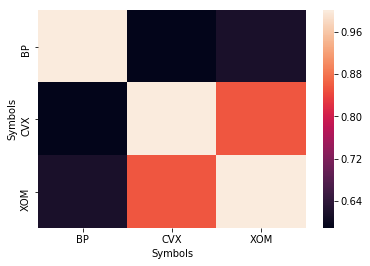

In [50]:
sns.heatmap(rets.corr() )

In [55]:
ser1=Series(list('wwxyzwdbuuvfwva'))
ser1

0     w
1     w
2     x
3     y
4     z
5     w
6     d
7     b
8     u
9     u
10    v
11    f
12    w
13    v
14    a
dtype: object

In [56]:
ser1.unique()

array(['w', 'x', 'y', 'z', 'd', 'b', 'u', 'v', 'f', 'a'], dtype=object)

In [57]:
ser1.value_counts()

w    4
u    2
v    2
a    1
z    1
f    1
d    1
b    1
x    1
y    1
dtype: int64

## V22 Missing data

In [59]:
data=Series(['One','Two',np.nan,'Four'])
data

0     One
1     Two
2     NaN
3    Four
dtype: object

In [62]:
data.isnull()

0    False
1    False
2     True
3    False
dtype: bool

In [63]:
data.dropna()

0     One
1     Two
3    Four
dtype: object

In [64]:
data

0     One
1     Two
2     NaN
3    Four
dtype: object

In [65]:
dframe=DataFrame([[1,2,3],[np.nan,5,6],[7,np.nan,9],
                  [np.nan,np.nan,np.nan]])
dframe

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0
3,NaN,NaN,NaN


In [67]:
clean_dframe=dframe.dropna()
clean_dframe

,0,1,2
0,1.0,2.0,3.0


In [68]:
dframe.dropna(how='all')

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0


In [69]:
dframe.dropna(axis=1)

""
0
1
2
3


In [70]:
dframe.dropna(axis=1,how='all')

,0,1,2
0,1.0,2.0,3.0
1,NaN,5.0,6.0
2,7.0,NaN,9.0
3,NaN,NaN,NaN


In [71]:
npn=np.nan
dframe2=DataFrame([[1,2,3,npn],[2,npn,5,6],[npn,7,npn,9],[1,npn,npn,npn]])

In [72]:
dframe2

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0
3,1.0,NaN,NaN,NaN


In [74]:
dframe2.dropna(thresh=2)
#having rows that only have two datapoints 

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0
2,NaN,7.0,NaN,9.0


In [75]:
dframe2.dropna(thresh=3)

,0,1,2,3
0,1.0,2.0,3.0,NaN
1,2.0,NaN,5.0,6.0


In [76]:
dframe2.fillna(1)

,0,1,2,3
0,1.0,2.0,3.0,1.0
1,2.0,1.0,5.0,6.0
2,1.0,7.0,1.0,9.0
3,1.0,1.0,1.0,1.0


In [78]:
dframe2.fillna({0:0,1:1,2:2,3:3})

#1:1 means in colmun index by 1 for all nan values fill the 1 value 

,0,1,2,3
0,1.0,2.0,3.0,3.0
1,2.0,1.0,5.0,6.0
2,0.0,7.0,2.0,9.0
3,1.0,1.0,2.0,3.0


permenantly changes : 


dframe2=dframe2.fillna(0) ..... 

dframe2.fillna(0,inplace=True)....


In [79]:
dframe2.fillna(0,inplace=True)
dframe2

,0,1,2,3
0,1.0,2.0,3.0,0.0
1,2.0,0.0,5.0,6.0
2,0.0,7.0,0.0,9.0
3,1.0,0.0,0.0,0.0


## V23 Index hierarchy

In [80]:
 from numpy.random import randn
    

In [83]:
ser=Series(randn(6),index=[[1,1,1,2,2,2],['a','b','c','a','b','c']])

In [84]:
ser

1  a    0.313897
   b   -1.053066
   c   -0.202946
2  a    0.230924
   b    0.351832
   c    1.345472
dtype: float64

In [85]:
ser.index

MultiIndex(levels=[[1, 2], ['a', 'b', 'c']],
           labels=[[0, 0, 0, 1, 1, 1], [0, 1, 2, 0, 1, 2]])

In [86]:
ser[1]

a    0.313897
b   -1.053066
c   -0.202946
dtype: float64

In [87]:
ser[2]

a    0.230924
b    0.351832
c    1.345472
dtype: float64

In [88]:
ser[1]['a']

0.3138974817143559

In [89]:
ser[:,'a']

1    0.313897
2    0.230924
dtype: float64

In [91]:
#ser[:]['a']  is false

In [94]:
#making dataFrame from series 
dframe=ser.unstack()

In [93]:
dframe

,a,b,c
1,0.313897,-1.053066,-0.202946
2,0.230924,0.351832,1.345472


In [100]:
dframe2=DataFrame(np.arange(16).reshape((4,4)),
                  index=[['a','a','b','b']
                         ,[1,2,1,2]]
                 ,columns=[['NY','NY','LA','SF'],
                           ['cold','hot','hot','cold']])
dframe2

NY      LA   SF
    cold hot hot cold
a 1    0   1   2    3
  2    4   5   6    7
b 1    8   9  10   11
  2   12  13  14   15

In [101]:
dframe2.index.names=['INDEX1','INDEX2']
dframe2.columns.names=['Cities','Temp']
dframe2

Cities          NY      LA   SF
Temp          cold hot hot cold
INDEX1 INDEX2                  
a      1         0   1   2    3
       2         4   5   6    7
b      1         8   9  10   11
       2        12  13  14   15

In [102]:
dframe2.swaplevel('Cities','Temp',axis=1)

Temp          cold hot     cold
Cities          NY  NY  LA   SF
INDEX1 INDEX2                  
a      1         0   1   2    3
       2         4   5   6    7
b      1         8   9  10   11
       2        12  13  14   15

In [104]:
dframe2.sortlevel(1)

/Users/ramin-ka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  """Entry point for launching an IPython kernel.


Cities          NY      LA   SF
Temp          cold hot hot cold
INDEX1 INDEX2                  
a      1         0   1   2    3
b      1         8   9  10   11
a      2         4   5   6    7
b      2        12  13  14   15

In [105]:
dframe2.sortlevel(0)
#whitch index leve will be sorting ==> arg.

/Users/ramin-ka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  """Entry point for launching an IPython kernel.


Cities          NY      LA   SF
Temp          cold hot hot cold
INDEX1 INDEX2                  
a      1         0   1   2    3
       2         4   5   6    7
b      1         8   9  10   11
       2        12  13  14   15

In [111]:
dframe2.sortlevel(0,axis=1)

/Users/ramin-ka/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: sortlevel is deprecated, use sort_index(level= ...)
  """Entry point for launching an IPython kernel.


Cities         LA   NY       SF
Temp          hot cold hot cold
INDEX1 INDEX2                  
a      1        2    0   1    3
       2        6    4   5    7
b      1       10    8   9   11
       2       14   12  13   15

In [108]:
dframe2.sum(level="Temp",axis=1)

Temp           cold  hot
INDEX1 INDEX2           
a      1          3    3
       2         11   11
b      1         19   19
       2         27   27